<a href="https://colab.research.google.com/github/jerry-simon/Data_Science_And_Machine_Learning/blob/main/Business_Case_Study_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1>Introduction to Netflix & Netflix Business Problem</H1>

<B>About Netflix : </B>

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally.

<B>Defining the Business Problem : </B>
	Analyse the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and,
	How Netflix can grow their business in different countries.


<H1>Synopsis of the Netflix Dataset</H1>

---



In [ ]:
#importing all the necessary library files for Data Analysis and Visualisation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#Reading the CSV file
df = pd.read_csv('netflix.csv')

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Only release year is considered to be integer and therfore the summary stats for the same

In [ ]:
#Understanding the basic structure of the dataframe
df.shape

(8807, 12)

<font color='green'>There are <B>8807</B> records and <B>12</B> columns present in the given netflix dataset.</font>

In [ ]:
#To see 10 random records from the given dataset
df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
911,s912,TV Show,Sab Jholmaal Hai,Vijay Roche,NaN,India,"May 7, 2021",2017,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","In this madcap comedy, two mischievous cats, a..."
3650,s3651,Movie,Twins Mission,To-hoi Kong,"Sammo Kam-Bo Hung, Gillian Chung, Charlene Cho...","Hong Kong, China","July 21, 2019",2007,TV-MA,102 min,"Action & Adventure, International Movies",To retrieve a healing bead stolen from its gua...
683,s684,Movie,A Family,Michihito Fujii,"Go Ayano, Hiroshi Tachi, Machiko Ono, Yukiya K...",NaN,"June 18, 2021",2021,TV-MA,135 min,"Dramas, International Movies","Taken in by the yakuza at a young age, Kenji s..."
4288,s4289,TV Show,Ashes of Love,NaN,"Yang Zi, Deng Lun, Luo Yunxi",China,"December 16, 2018",2018,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Hidden away by her mother, the Floral Goddess,..."
6952,s6953,Movie,Hedgehogs,Huang Jianming,"Anthony Padilla, Ian Hecox, Jenn McAllister, J...","United States, China","April 1, 2019",2016,PG,94 min,Children & Family Movies,When a hedgehog suffering from memory loss for...
5423,s5424,Movie,Puss in Book: Trapped in an Epic Tale,"Roy Burdine, Johnny Castuciano","Eric Bauza, Jayma Mays, Maria Bamford, Jeff Be...",United States,"June 20, 2017",2017,TV-Y7,24 min,"Children & Family Movies, Comedies","After tumbling into a magic storybook, Puss in..."
1888,s1889,Movie,Good Game: The Beginning,Umut Aral,"Mert Yazıcıoğlu, Afra Saraçoğlu, Yiğit Kirazcı...",Turkey,"October 3, 2020",2018,TV-14,115 min,"Dramas, International Movies, Sports Movies",New high school grad and avid gamer Cenk is re...
3352,s3353,TV Show,We Are the Wave,NaN,"Ludwig Simon, Luise Befort, Michelle Barthel, ...",Germany,"November 1, 2019",2019,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A mysterious classmate leads four idealistic t...
4194,s4195,Movie,The Doll,Rocky Soraya,"Shandy Aulia, Denny Sumargo, Sara Wijayanto, V...",Indonesia,"January 15, 2019",2016,TV-MA,106 min,"Horror Movies, International Movies",Eerie things begin to happen after a man gives...
6983,s6984,Movie,Holding the Man,Neil Armfield,"Ryan Corr, Craig Stott, Kerry Fox, Camilla Ah ...",Australia,"August 1, 2016",2015,TV-MA,128 min,"Dramas, International Movies, LGBTQ Movies","In 1970s Australia, two teen boys fall in love..."


In [ ]:
#To check the number of null values present in the given dataset
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<font color='green'>There are 6 columns that contains the Null values and they are <B>director</B> which has <B>2634</B> Null values, <B>cast</B> has got <B>825</B> Null values. In addition, <B>country</B> has <B>831</B> Null values, followed by <B>date_added</B> has <B>10</B> Null values and <B>rating</B> has <B>4</B> Null's. Finally, <B>duration</B> has <B>3</B> Null values.</font>





In [ ]:
# To get a comprehensive overview of netflix dataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<font color='green'>The following Python function reveals some of the key information related to the Netflix dataset. First and foremost, the index range. There are <B>8807 records ranging from 0 to 8806</B>. The next important insight that we can draw from this function is that it contains the names of all <B>columns</B> followed by its <B>datatypes</B>. The <B>release year</B> is in the <B>integer</B> datatype or <B>int64</B> and <B>rest all the columns are of object</B> datatype. In short, there are <B>11</B> columns with <B>object</B> datatype and <B>1</B> column with <B>integer</B> datatype.

Furthermore, the funtion also delve into the <B>number of non-null enteries</B> in the dataset. As mentioned earlier, there are <B>6 columns (Director, Cast, Country, Date_added, Rating and Duration) that suffers from data loss</B> and the rest of the <B>6 columns are absolutely fine</B>. Finally, the <B>data frame</B> occupies circa <B>825.8 kilo bytes of memory</B>.</font>

<H1>Data Preparation</H1>

---



In [ ]:
#Un-nesting the director column as there are more than one director present in each record seperated by commas
df_director_r = pd.DataFrame(df['director'].apply(lambda x: str(x).split(',')).tolist(), index = df['title']) #Split the Director column values based on comma and convert it into list and save it to a variable.
df_director = df_director_r.stack().reset_index() #The above variable is then applied to a stack function for effectively converting data frame from a wide format to a long format.
df_director.drop('level_1', axis=1, inplace=True) #There will be an extra column will be created with empty values named level_1. In this it is dropped using drop function.
df_director.rename(columns={0:'Director'}, inplace=True) #	Finally, the director column name is 0. Which is then replaced by ‘Director’ using rename function.
df_director.sample(10)

,title,Director
6118,Asperger's Are Us,Alex Lehmann
2476,Desperados,LP
9173,The Man Who Would Be Polka King,John Mikulak
9499,We Belong Together,Chris Stokes
5578,Bon Cop Bad Cop 2,Alain Desrochers
5984,Five Came Back,Laurent Bouzereau
9388,Tom and Jerry: The Magic Ring,Phil Roman
5354,Paradox,Daryl Hannah
4265,Suzzanna: Buried Alive,Rocky Soraya
8005,Magnetic,Thierry Donard


<font color='green'>From the above output it is clear that the director values are splitted and stacked under the same title but in different rows</font>

In [ ]:
#Un-nesting the cast column as there are more than one actor present in each record seperated by commas
df_cast_r = pd.DataFrame(df['cast'].apply(lambda x: str(x).split(',')).tolist(), index = df['title']) #Split the Cast column values based on comma and convert it into list and save it to a variable.
df_cast = df_cast_r.stack().reset_index() #The above variable is then applied to a stack function for effectively converting data frame from a wide format to a long format.
df_cast.drop('level_1', axis=1, inplace=True) #There will be an extra column will be created with empty values named level_1. In this it is dropped using drop function.
df_cast.rename(columns={0:'Cast'}, inplace=True) #Finally, the cast column name is 0. Which is then replaced by ‘Cast’ using rename function.
df_cast.sample(10)

,title,Cast
46496,Beauty & the Beast,Max Brown
25151,The Chosen One,Tuna Dwek
14714,Out of Life,Roger Assaf
60967,The Drowning,Jasper Newell
40009,The Guardian Brothers,Dan Fogler
10517,Classmates Minus,Liu Kuan-ting
18540,BNA,Sumire Morohoshi
23036,Isi & Ossi,Lisa Vicari
24632,Agent,Sisanda Henna
10582,Pitta Kathalu,Uko


<font color='green'>From the above output it is clear that the actor/cast values are splitted and stacked under the same title but in different rows</font>

In [ ]:
#Un-nesting the country column as there are more than one country present in each record seperated by commas
df_country_r = pd.DataFrame(df['country'].apply(lambda x: str(x).split(',')).tolist(), index = df['title']) #Split the Country column values based on comma and convert it into list and save it to a variable.
df_country = df_country_r.stack().reset_index() #The above variable is then applied to a stack function for effectively converting data frame from a wide format to a long format.
df_country.drop('level_1', axis=1, inplace=True) #There will be an extra column will be created with empty values named level_1. In this it is dropped using drop function.
df_country.rename(columns={0:'Country'}, inplace=True) #Finally, the country column name is 0. Which is then replaced by ‘Country’ using rename function.
df_country.sample(10)

,title,Country
6424,World War II in Colour,United Kingdom
7478,Barely Lethal,United States
6492,Counterpunch,United States
7908,Death at a Funeral,United States
1757,QB1: Beyond the Lights,United States
8992,Mater,Argentina
4855,Weapon of Choice,Austria
2366,Bully,United States
8424,Highway Thru Hell,Canada
4107,Revenge of the Pontianak,Malaysia


<font color='green'>From the above output it is clear that the Country values are splitted and stacked under the same title but in different rows</font>

In [ ]:
#Un-nesting the listed_in or Genre column as there are more than one genre present in each record seperated by commas
df_listed_in_r = pd.DataFrame(df['listed_in'].apply(lambda x: str(x).split(',')).tolist(), index = df['title']) #Split the Listed_in column values based on comma and convert it into list and save it to a variable.
df_listed_in = df_listed_in_r.stack().reset_index() #The above variable is then applied to a stack function for effectively converting data frame from a wide format to a long format.
df_listed_in.drop('level_1', axis=1, inplace=True) #There will be an extra column will be created with empty values named level_1. In this it is dropped using drop function.
df_listed_in.rename(columns={0:'listed_in'}, inplace=True) #Finally, the listed_in column name is 0. Which is then replaced by ‘listed_in’ using rename function.
df_listed_in.sample(10)

,title,listed_in
14948,Follow Me,Documentaries
18185,The Day My Butt Went Psycho!,TV Comedies
5708,The Half Of It,Dramas
13561,Amar Akbar & Tony,Comedies
14648,Doomsday Preppers,Reality TV
11547,TURN: Washington's Spies,TV Dramas
12855,Mascots,Comedies
2452,3 Idiots,International Movies
4846,In The Dark,Crime TV Shows
3041,Busted!,Korean TV Shows


<font color='green'>From the above output it is clear that the listed in or genre values are splitted and stacked under the same title but in different rows</font>

In [ ]:
#Merging the un-nested columns togather
df_new = df_director.merge(df_cast, how='inner', on='title')
df_new_1 = df_new.merge(df_country, how='inner', on='title')
df_new_2 = df_new_1.merge(df_listed_in, how='inner', on='title')
df_new_2.sample(10)

,title,Director,Cast,Country,listed_in
182142,Shark Busters,Herman Yau,Brian Ireland,Hong Kong,International Movies
4177,Osmosis Jones,Peter Farrelly,Ben Stein,United States,Action & Adventure
54100,Only,Takashi Doscher,Leslie Odom Jr.,United States,Independent Movies
116461,FullMetal Alchemist,Fumihiko Sori,Shinji Uchiyama,Japan,International Movies
173566,Nura: Rise of the Yokai Clan: Demon Capital,nan,Cassandra Lee,Japan,Anime Series
198294,Tusk,Kevin Smith,Michael Parks,United States,Horror Movies
155472,Gomorrah,nan,Lino Musella,Italy,TV Dramas
12885,Midnight Diner: Tokyo Stories,nan,Bsaku Sato,Japan,TV Dramas
68558,I Am Not Okay With This,nan,Kathleen Rose Perkins,United States,TV Comedies
78093,Girls und Panzer der Film,Tsutomu Mizushima,Mami Ozaki,Japan,Action & Adventure


In [ ]:
#Identifying all the column names of the original table
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
#Merging all the un-nested table togather with the original table
df_final = df_new_2.merge(df[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration', 'description']], on=['title'], how='left')
df_final.sample(10)

,title,Director,Cast,Country,listed_in,show_id,type,date_added,release_year,rating,duration,description
8739,The Last Boy Scout,Tony Scott,Halle Berry,United States,Comedies,s355,Movie,"August 1, 2021",1991,R,105 min,Private eye Joe Hallenbeck is forced to team u...
32987,Black Beach,Esteban Crespo,Mulie Jarju,Spain,Action & Adventure,s1348,Movie,"February 3, 2021",2020,TV-MA,116 min,A lawyer with a promising future is forced to ...
195809,The Time Traveler's Wife,Robert Schwentke,Tatum McCann,United States,Sci-Fi & Fantasy,s8533,Movie,"October 1, 2019",2009,PG-13,107 min,"Due to a genetic disorder, handsome librarian ..."
39615,Sugar Rush Christmas,nan,Adriano Zumbo,United States,Reality TV,s1642,TV Show,"November 27, 2020",2020,TV-14,2 Seasons,"It's everything you love about ""Sugar Rush"" – ..."
192734,The Lobster,Yorgos Lanthimos,John C. Reilly,Greece,Romantic Movies,s8399,Movie,"December 2, 2018",2015,R,119 min,"In a near-future world, single people are hunt..."
25052,Jaane Tu... Ya Jaane Na,Abbas Tyrewala,Prateik Babbar,India,Comedies,s1019,Movie,"April 17, 2021",2008,TV-14,147 min,Soft-spoken Jai and spitfire beauty Aditi coul...
53375,The Twelve,Wouter Bouvijn,Lynn Van Royen,Belgium,TV Dramas,s2252,TV Show,"July 10, 2020",2019,TV-MA,1 Season,Twelve jurors — ordinary people with struggles...
149124,Death at a Funeral,Neil LaBute,Regina Hall,United States,Comedies,s6584,Movie,"August 1, 2020",2010,R,93 min,"When a Los Angeles family's patriarch dies, hi..."
148020,CRD,Kranti Kanade,Geetika Tyagi,India,Independent Movies,s6542,Movie,"April 29, 2019",2016,TV-MA,110 min,At odds with his radical instructor's ruthless...
134012,Shrek the Musical,Jason Moore,Leah Greenhaus,United States,Children & Family Movies,s5937,Movie,"December 29, 2013",2013,TV-G,130 min,The greatest fairy tale never told comes to li...


In [ ]:
df_final.shape

(202065, 12)

<font color='green'>There are <B>202065</B> records and <B>12</B> columns present in the given netflix dataset after unnesting and merge.</font>

In [ ]:
#Checking for the Null values after the merging.
df_final.isnull().sum()

title             0
Director          0
Cast              0
Country           0
listed_in         0
show_id           0
type              0
date_added      158
release_year      0
rating           67
duration          3
description       0
dtype: int64

<font color='green'>In the previous scenario we have clearly identified that <B>Director</B>, <B>Cast</B> and <B>Country</B> contains the Null values. However, in the above code we can see that there is no null vales present in these columns. This small descrepency araise due to un-nesting of these columns. While performing un-nesting we have converted these columns to string datatype as a result each 'nan' present in these columns are also converted to string which is not identified by the isnull().However, Null values are still present in <B>date_added</B>, <B>release_year</B> and <B>duration</B> which can be seen from the above output.</font>

In [ ]:
#Check how many null values are present in the Director, Cast and Country columns
Director_Nulls = (df_final['Director'] == 'nan').sum()
Cast_Nulls = (df_final['Cast'] == 'nan').sum()
Country_Nulls = (df_final['Country'] == 'nan').sum()
print('Director Nulls: ', Director_Nulls)
print('Cast Nulls: ', Cast_Nulls)
print('Country Nulls: ', Country_Nulls)

Director Nulls:  50643
Cast Nulls:  2149
Country Nulls:  11897


In [ ]:
#Handling Null values in the Director and Cast columns
df_final['Cast'].replace(['nan'],['Unknown Actor'], inplace=True) #nan values in the Cast column is replaced by Unknown Actor
df_final['Director'].replace(['nan'],['Unknown Director'], inplace=True) #nan values in the Director column is replaced by Unknown Director
df_final.head()

,title,Director,Cast,Country,listed_in,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


<font color='green'>We have replaced each 'nan' value form the <B>director</B> column with <B>Unknown Director</B> and each 'nan' value from the <B>cast</B> column with <B>Unknown Actor</B>.</font>

<font color='green'>Handiling the nan values in the 'Country' column. Initially, the nan values are replced by Director's Country. The below function does the same</font>

In [ ]:
# Define the function to process the Director 'Country' column
def process_director_country(row):
  if (row['Country'] == 'nan'):
    # Check if Director is 'Unknown Director'
    if row['Director'] != 'Unknown Director':
      # Check mode for the director
      director_mode = df_final[df_final['Director'] == row['Director']]['Country'].mode()
      if not director_mode.empty and director_mode.iloc[0] != 'nan':
        return director_mode.iloc[0]
      else:
        return 'nan'
    else:
      return 'nan'
  else:
    return row['Country']

In [ ]:
df_final['Country'] = df_final.apply(process_director_country, axis=1) #applying the function to substitue nan values in the country column using Director's Country

In [ ]:
#Checking how many nan values are available after substituting nan values in the country column using Director's Country
Country_Nulls = (df_final['Country'] == 'nan').sum()
Country_Nulls

10850

<font color = 'green'>It appears that there are <B>10850</B> nan values are still available after substituting nan values in the country column using Director's Country:</font>

<font color='green'>Handiling the nan values in the 'Country' column. Additionally, the nan values are replced by Cast's Country. The below function does the same. If it still showing the nan values then substitue it with 'Unknown Country'</font>

In [ ]:
# Define the function to process the Actor 'Country' column
def process_actor_country(row):
  if (row['Country'] == 'nan'):
    # Check if Actor is 'Unknown Actor'
    if row['Cast'] != 'Unknown Actor':
      # Check mode for the Actor
      actor_mode = df_final[df_final['Cast'] == row['Cast']]['Country'].mode()
      if not actor_mode.empty and actor_mode.iloc[0] != 'nan':
        return actor_mode.iloc[0]
      else:
        return 'Unknown Country'
    else:
      return 'Unknown Country'
  else:
    return row['Country']

In [ ]:
df_final['Country'] = df_final.apply(process_actor_country, axis=1) #applying the function to substitue nan values in the country column using Actor's Country

In [ ]:
#Checking how many nan values are available after substituting nan values in the country column using Cast's Country
Country_Nulls = (df_final['Country'] == 'nan').sum()
Country_Nulls

0

<font color = 'green'>It appears that there are <B>0</B> nan values. This simply means that nan values of country is effectively handled</font>

In [ ]:
#Checking for the sample of dataframe df_final
df_final.sample(10)

,title,Director,Cast,Country,listed_in,show_id,type,date_added,release_year,rating,duration,description
71448,Airplane Mode,César Rodrigues,Eike Duarte,United States,International Movies,s2996,Movie,"January 23, 2020",2020,TV-PG,97 min,"When Ana, an influencer, crashes her car while..."
68448,Pokémon: Mewtwo Strikes Back - Evolution,Motonori Sakakibara,Sarah Natochenny,Japan,Anime Features,s2877,Movie,"February 27, 2020",2019,TV-Y7,98 min,After accepting an invitation from a mysteriou...
93950,The Eagle of El-Se'eed,Unknown Director,Dorra Zarrouk,Unknown Country,International TV Shows,s3977,TV Show,"March 25, 2019",2018,TV-14,1 Season,A police officer and a drug lord become embroi...
89037,Beats,Chris Robinson,Emayatzy Corinealdi,United States,Independent Movies,s3732,Movie,"June 19, 2019",2019,TV-MA,110 min,"On Chicago's South Side, hip-hop prodigy Augus..."
183925,Soul to Keep,Monière,Tony Spitz,United States,Independent Movies,s8061,Movie,"July 1, 2019",2019,TV-MA,94 min,Two siblings invite friends to their inherited...
72657,Monsters: Dark Continent,Tom Green,Sofia Boutella,United Kingdom,Independent Movies,s3039,Movie,"January 10, 2020",2014,R,119 min,An American platoon stationed in the Middle Ea...
131271,Much Ado About Nothing,Alejandro Fernández Almendras,Alejandro Goic,France,Independent Movies,s5771,Movie,"October 1, 2016",2016,TV-MA,96 min,Carefree college student Vicente ends up in a ...
134751,Feb-09,Unknown Director,Hala,Unknown Country,International TV Shows,s5965,TV Show,"March 20, 2019",2018,TV-14,1 Season,"As a psychology professor faces Alzheimer's, h..."
15775,Underworld: Awakening,Måns Mårlind,Theo James,United States,Horror Movies,s612,Movie,"July 1, 2021",2012,R,89 min,As the war between vampires and Lycans rages o...
179646,Room,Lenny Abrahamson,Jacob Tremblay,Ireland,Independent Movies,s7890,Movie,"July 19, 2018",2015,R,118 min,"Kidnapped, confined to a tiny room and raped, ..."


In [ ]:
#Checking for the nan values for the duration column
df_final[df_final['duration'].isnull()]

,title,Director,Cast,Country,listed_in,show_id,type,date_added,release_year,rating,duration,description
126582,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,Movies,s5542,Movie,"April 4, 2017",2017,74 min,NaN,"Louis C.K. muses on religion, eternal love, gi..."
131648,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,Movies,s5795,Movie,"September 16, 2016",2010,84 min,NaN,Emmy-winning comedy writer Louis C.K. brings h...
131782,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,Movies,s5814,Movie,"August 15, 2016",2015,66 min,NaN,The comic puts his trademark hilarious/thought...


<font color = 'green'>It appears that there are <B>3</B> nan values are available for the duration column. Surprisingly these values are mistakenly sawpped with the rating column. Our duty is to Swap nan values in the duration column with rating column</font>

In [ ]:
# Get the indices of the rows where duration is null
null_duration_indices = df_final[df_final['duration'].isnull()].index

# Print the indices
print(null_duration_indices)

Index([126582, 131648, 131782], dtype='int64')


In [ ]:
#The following function swaps rating and duration columns with the help of the variable named null_duration_indices as shown in the above code.
df_final.loc[null_duration_indices, ['rating', 'duration']] = df_final.loc[null_duration_indices, ['duration', 'rating']].values

In [ ]:
#Check for any null value is present in the duration column
(df_final['duration'].isnull()).sum()

0

<font color = 'green'>It appears that there are <B>0</B> nan values. This simply means that nan values of duration is effectively handled.</font>

In [ ]:
(df_final['rating'].isnull()).sum()

70

<font color = 'green'>It appears that there are <B>70</B> nan values are available in the rating column.</font>

In [ ]:
#using mode of rating to substitute the nan values present in the rating column. Once it is applied there are no nan/ null values present in the rating column.
rating_mode = df_final['rating'].mode().iloc[0]
df_final = df_final.fillna({'rating': rating_mode})
(df_final['rating'].isnull()).sum()

0

In [ ]:
(df_final['date_added'].isnull()).sum() #Calculating the number of nan values present in date_added column. It shows that there are 158 nan values present.

158

<font color='green'>Handiling the nan values in the 'date_added' column. The nan values are replced by mode of date_added selected by respective release_year. The below function does the same</font>

In [ ]:
def process_date_added(row):
    if pd.isnull(row['date_added']):
        return df_final[df_final['release_year'] == row['release_year']]['date_added'].mode().iloc[0] #mode of date_added is selected using the release year.
    else:
        return row['date_added']

In [ ]:
df_final['date_added'] = df_final.apply(process_date_added, axis=1) #applying the function to substitue nan values in the date_added column using mode of date_added.
(df_final['date_added'].isnull()).sum() #Check how many null values are available and it shows that there are 0 null values.

0

In [ ]:
df_final['Country'] = df_final['Country'].str.lstrip() #Removing the leading white space from the Country column as it creates duplicate entry for the same country. Eg: 'United States' and ' United States' is treated as 2 different countries if lstrip is not used.

<H1>Data Analysis : Graphical and Non-Graphical Visualisations</H1>

---



In [ ]:
df_final['type'].value_counts()#number of movies and TV Shows

type
Movie      145917
TV Show     56148
Name: count, dtype: int64

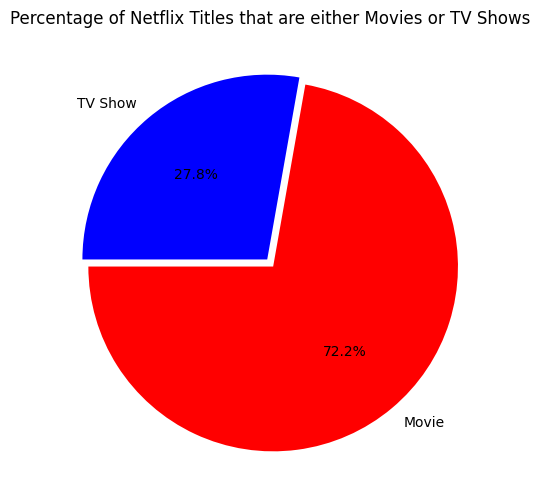

<Figure size 640x480 with 0 Axes>

In [ ]:
#Percentage of number of movies and TV Shows in Netflix
plt.figure(figsize=(12,6))
plt.title("Percentage of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(df_final.type.value_counts(),explode=(0.025,0.025),labels=df_final.type.value_counts().index, colors=['red','blue'],autopct='%1.1f%%', startangle=180)
plt.show()
plt.savefig('pie_chart.png')

<font color='green'>There are more movies available in the netflix platform compared to TV Shows</font>

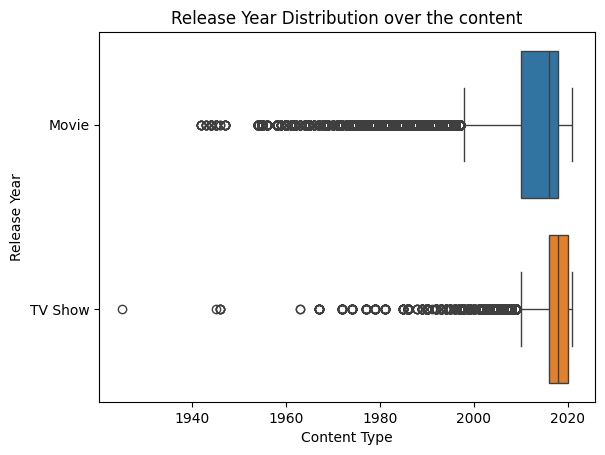

In [ ]:
#To check the content distributuion over the release year
sns.boxplot(x='release_year', y='type', hue='type', data=df_final)
plt.title('Content Distribution over the Release year')
plt.xlabel('Content Type')
plt.ylabel('Release Year')
plt.show()

<font color = 'green'>There are three main insights that we can draw from the above chart.

1. Over the release year, netflix has stored comparitively high number of movies that are released between 1990 (approx.) to 2020. On the other hand, netflix stored high amount of TV Shows that are released between 2010 (approx.) to 2020.

2. It is obvious that there is significant rise of TV Shows in the recent years.

3. Although netflix has a good number of movies in its collection, the oldest content available in the netflix platform is actually a TV Show which is released back in 1920's (approx.). This can also be considered as a potential outlier. </font>

In [ ]:
#identifying the Oldest TV Show which is released in 1925 and available in Netflix. Can be considered as a potential outlier.
df_final[df_final['release_year'] == df_final['release_year'].min()]

,title,Director,Cast,Country,listed_in,show_id,type,date_added,release_year,rating,duration,description
99245,Pioneers: First Women Filmmakers*,Unknown Director,Unknown Actor,Unknown Country,TV Shows,s4251,TV Show,"December 30, 2018",1925,TV-14,1 Season,This collection restores films from women who ...


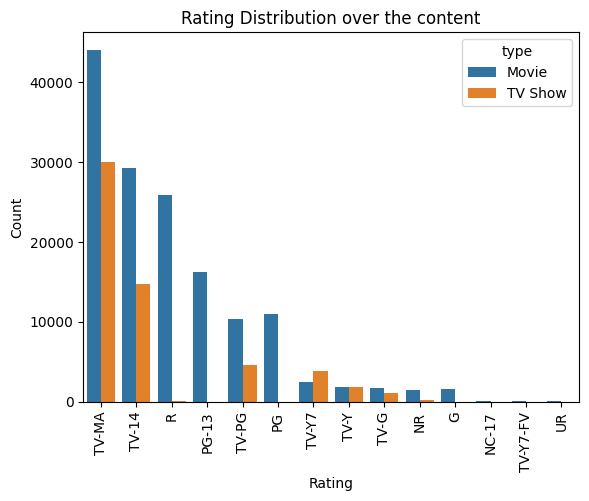

In [ ]:
#Identifying the rating distribution over the content type
sns.countplot(x='rating', data=df_final, hue='type', order=df_final['rating'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Rating Distribution over the content')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

<font color = 'green'>It is considered that TV-MA rated TV Shows and movies are quiet popular in netflix platform</font>

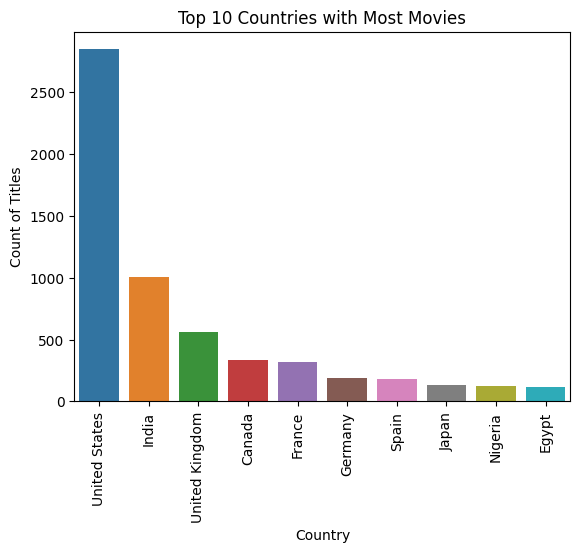

In [ ]:
#Top 10 countries with most movies.
xx = df_final[df_final['type'] == 'Movie']
xx = xx[xx.Country != 'Unknown Country'].groupby('Country')['title'].nunique().sort_values(ascending=False)[:10]
sns.barplot(x=xx.index, y=xx.values, hue=xx.index)
plt.xticks(rotation=90)
plt.title('Top 10 Countries with Most Movies')
plt.xlabel('Country')
plt.ylabel('Count of Titles')
plt.show()

<font color = 'green'>It appears US, India and UK are some of the countries with most movies available.</font>

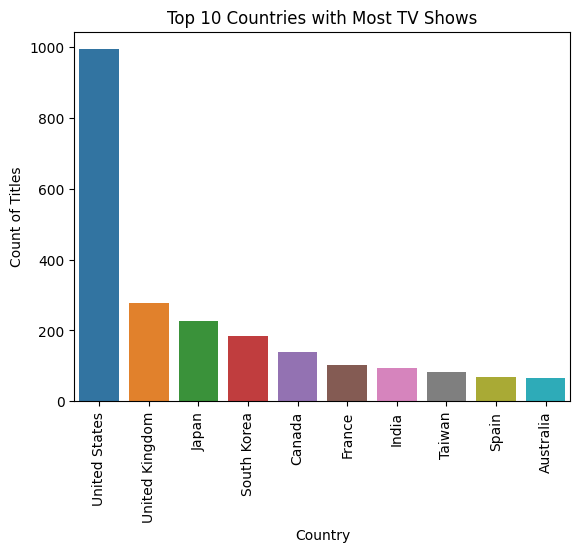

In [ ]:
#Top 10 countries with most TV-shows.
yy = df_final[df_final['type'] == 'TV Show']
yy = yy[yy.Country != 'Unknown Country'].groupby('Country')['title'].nunique().sort_values(ascending=False)[:10]
sns.barplot(x=yy.index, y=yy.values, hue=yy.index)
plt.xticks(rotation=90)
plt.title('Top 10 Countries with Most TV Shows')
plt.xlabel('Country')
plt.ylabel('Count of Titles')
plt.show()

<font color = 'green'>It appears US, UK and Japan are some of the countries with most TV-shows available.</font>

<ipython-input-43-1a5c1acc7375>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xx['date_added'] = pd.to_datetime(xx['date_added'])
<ipython-input-43-1a5c1acc7375>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xx['week'] = xx['date_added'].dt.isocalendar().week.astype(str)


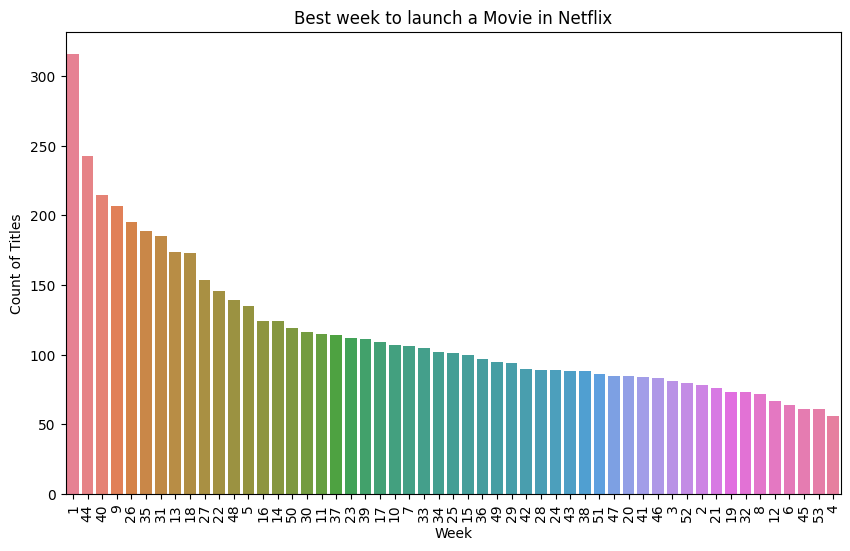

In [ ]:
#Identifying the best week to launch a movie
xx = df_final[df_final['type'] == 'Movie']
xx['date_added'] = pd.to_datetime(xx['date_added'])
xx['week'] = xx['date_added'].dt.isocalendar().week.astype(str)
xx = xx.groupby('week')['title'].nunique().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=xx.index, y=xx.values, hue=xx.index)
plt.xticks(rotation=90)
plt.title('Best week to launch a Movie in Netflix')
plt.xlabel('Week')
plt.ylabel('Count of Titles')
plt.show()

<font color='green'>It appears Week 1, 44, 40, 9, 26 are some of the best weeks to launch a movie in the Netflix platform</font>

<ipython-input-44-b53e6e03df6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yy['date_added'] = pd.to_datetime(yy['date_added'], format='mixed')
<ipython-input-44-b53e6e03df6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yy['week'] = yy['date_added'].dt.isocalendar().week.astype(str)


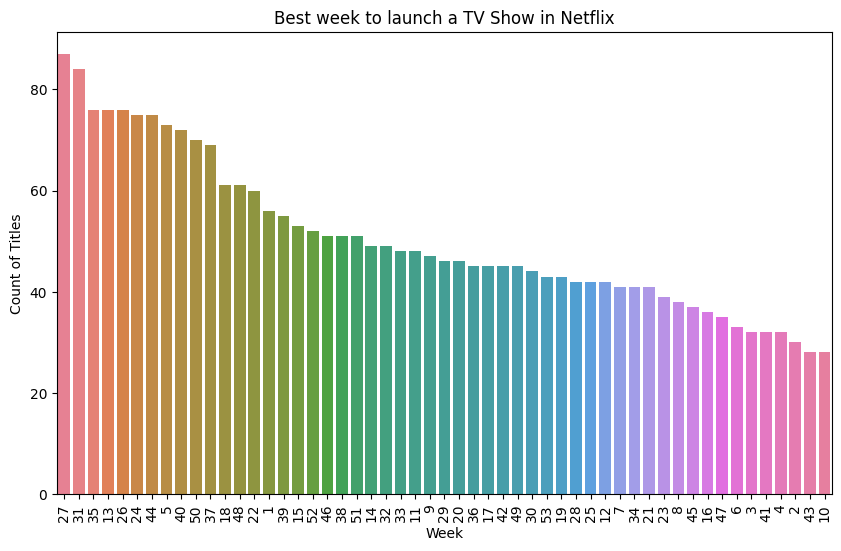

In [ ]:
#Best week to launch a TV - Show
yy = df_final[df_final['type'] == 'TV Show']
yy['date_added'] = pd.to_datetime(yy['date_added'], format='mixed')
yy['week'] = yy['date_added'].dt.isocalendar().week.astype(str)
yy = yy.groupby('week')['title'].nunique().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=yy.index, y=yy.values, hue=yy.index)
plt.xticks(rotation=90)
plt.title('Best week to launch a TV Show in Netflix')
plt.xlabel('Week')
plt.ylabel('Count of Titles')
plt.show()

<font color='green'>It appears Week 27, 31, 35, 13, 26 are some of the best weeks to launch a TV-show in the Netflix platform</font>

<ipython-input-45-17b61c367118>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xx['date_added'] = pd.to_datetime(xx['date_added'])
<ipython-input-45-17b61c367118>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xx['Month'] = xx['date_added'].dt.strftime('%B')


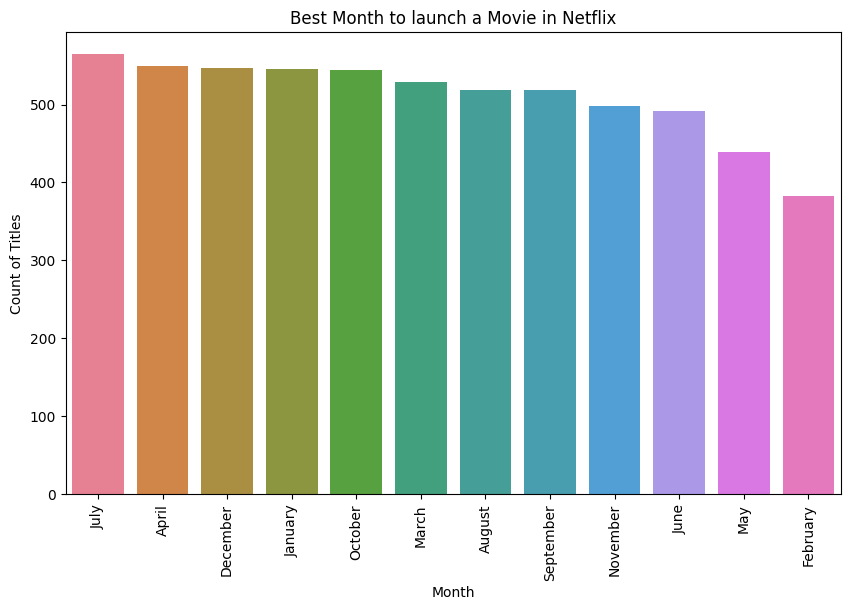

In [ ]:
#Best month to launch a movie
xx = df_final[df_final['type'] == 'Movie']
xx['date_added'] = pd.to_datetime(xx['date_added'])
xx['Month'] = xx['date_added'].dt.strftime('%B')
xx = xx.groupby('Month')['title'].nunique().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=xx.index, y=xx.values, hue=xx.index)
plt.xticks(rotation=90)
plt.title('Best Month to launch a Movie in Netflix')
plt.xlabel('Month')
plt.ylabel('Count of Titles')
plt.show()

best month to launch a Movie is July, April and December.

<ipython-input-46-976838c8f355>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yy['date_added'] = pd.to_datetime(yy['date_added'], format='mixed')
<ipython-input-46-976838c8f355>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yy['Month'] = yy['date_added'].dt.strftime('%B')


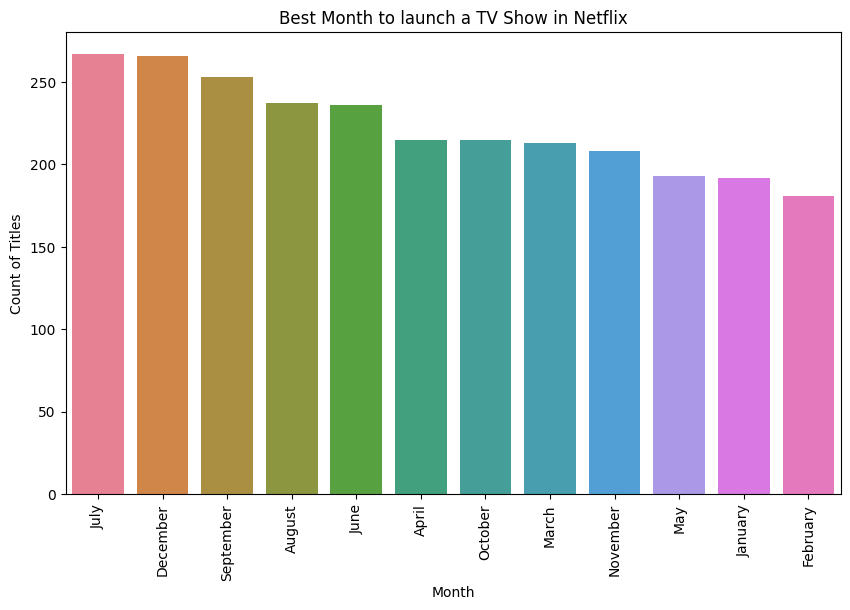

In [ ]:
#Best month to launch a TVshow
yy = df_final[df_final['type'] == 'TV Show']
yy['date_added'] = pd.to_datetime(yy['date_added'], format='mixed')
yy['Month'] = yy['date_added'].dt.strftime('%B')
yy = yy.groupby('Month')['title'].nunique().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=yy.index, y=yy.values, hue=yy.index)
plt.xticks(rotation=90)
plt.title('Best Month to launch a TV Show in Netflix')
plt.xlabel('Month')
plt.ylabel('Count of Titles')
plt.show()

best month to launch a TV show is July, December and September.

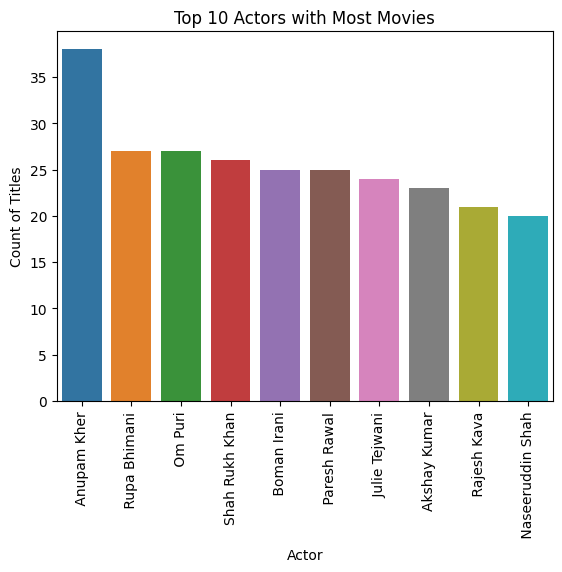

In [ ]:
#Top 10 actors with most movies
xx = df_final[df_final['type'] == 'Movie']
xx = xx[xx.Cast != 'Unknown Actor'].groupby('Cast')['title'].nunique().sort_values(ascending=False)[:10]
sns.barplot(x=xx.index, y=xx.values, hue=xx.index)
plt.xticks(rotation=90)
plt.title('Top 10 Actors with Most Movies')
plt.xlabel('Actor')
plt.ylabel('Count of Titles')
plt.show()

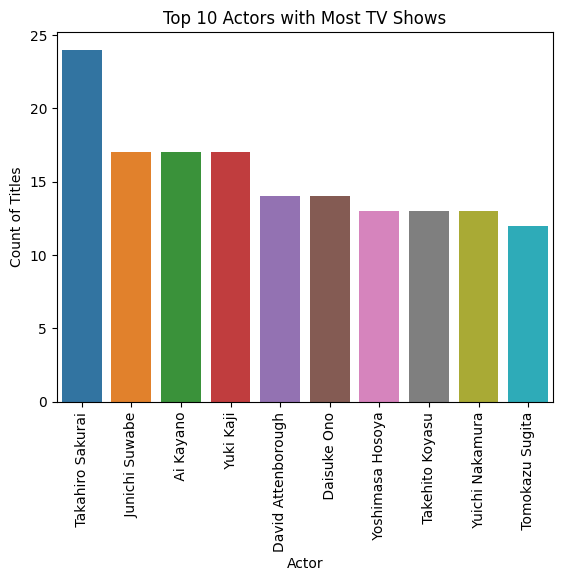

In [ ]:
#Top 10 Actors with Most TV Shows
yy = df_final[df_final['type'] == 'TV Show']
yy = yy[yy.Cast != 'Unknown Actor'].groupby('Cast')['title'].nunique().sort_values(ascending=False)[:10]
sns.barplot(x=yy.index, y=yy.values, hue=yy.index)
plt.xticks(rotation=90)
plt.title('Top 10 Actors with Most TV Shows')
plt.xlabel('Actor')
plt.ylabel('Count of Titles')
plt.show()

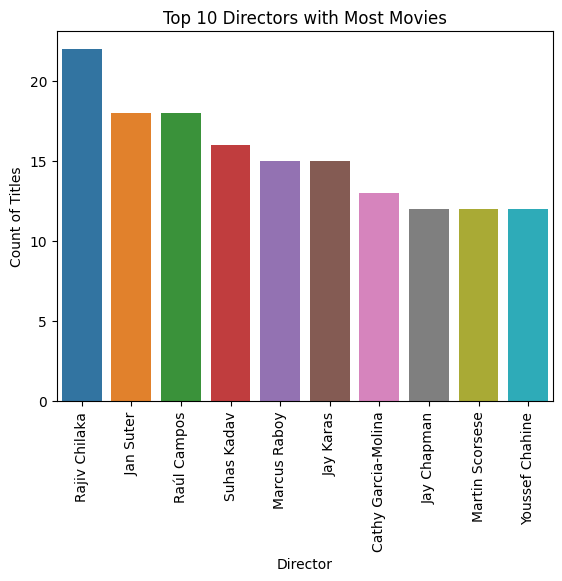

In [ ]:
#Top 10 Directors with Most Movies
xx = df_final[df_final['type'] == 'Movie']
xx = xx[xx.Director != 'Unknown Director'].groupby('Director')['title'].nunique().sort_values(ascending=False)[:10]
sns.barplot(x=xx.index, y=xx.values, hue=xx.index)
plt.xticks(rotation=90)
plt.title('Top 10 Directors with Most Movies')
plt.xlabel('Director')
plt.ylabel('Count of Titles')
plt.show()

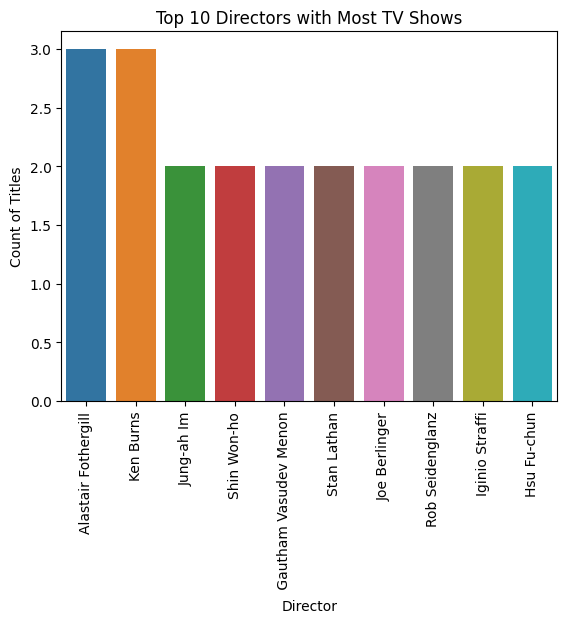

In [ ]:
#Top 10 Directors with Most TV Shows
yy = df_final[df_final['type'] == 'TV Show']
yy = yy[yy.Director != 'Unknown Director'].groupby('Director')['title'].nunique().sort_values(ascending=False)[:10]
sns.barplot(x=yy.index, y=yy.values, hue=yy.index)
plt.xticks(rotation=90)
plt.title('Top 10 Directors with Most TV Shows')
plt.xlabel('Director')
plt.ylabel('Count of Titles')
plt.show()

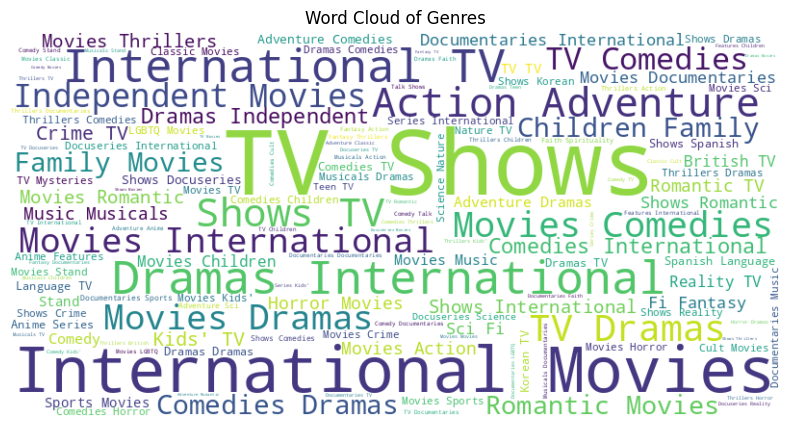

In [ ]:
from wordcloud import WordCloud
text = ' '.join(df['listed_in'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Genres')
plt.show()

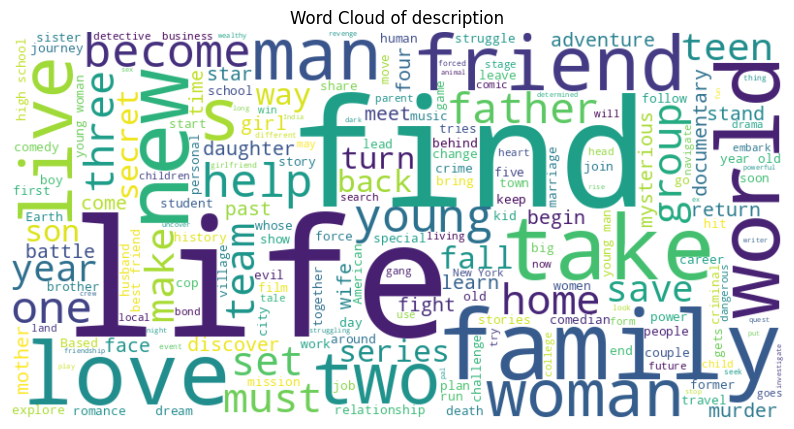

In [ ]:
text = ' '.join(df['description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of description')
plt.show()

In [ ]:
df_final['netflix_date_added'] = pd.to_datetime(df_final['date_added'], errors='coerce')

# Assuming the movie was released on January 1st of the release_year
df_final['release_date'] = pd.to_datetime(df_final['release_year'].astype(str) + '-01-01')

# Calculate the difference in days
df_final['days_to_add'] = (df_final['netflix_date_added'] - df_final['release_date']).dt.days

# Find the mode of the differences
mode_days_to_add = df_final['days_to_add'].mode()[0]

In [ ]:
mode_days_to_add

547.0

it takes around 547 days or 1.5 years approximately to add a content in the Netflix platform once it is released.

In [ ]:
# Convert the 'date_added' column to a datetimelike object
df_final['date_added'] = pd.to_datetime(df_final['date_added'], errors='coerce')

# Now you can use the .dt accessor
df_final['netflix_added_year'] = df_final['date_added'].dt.strftime('%Y')

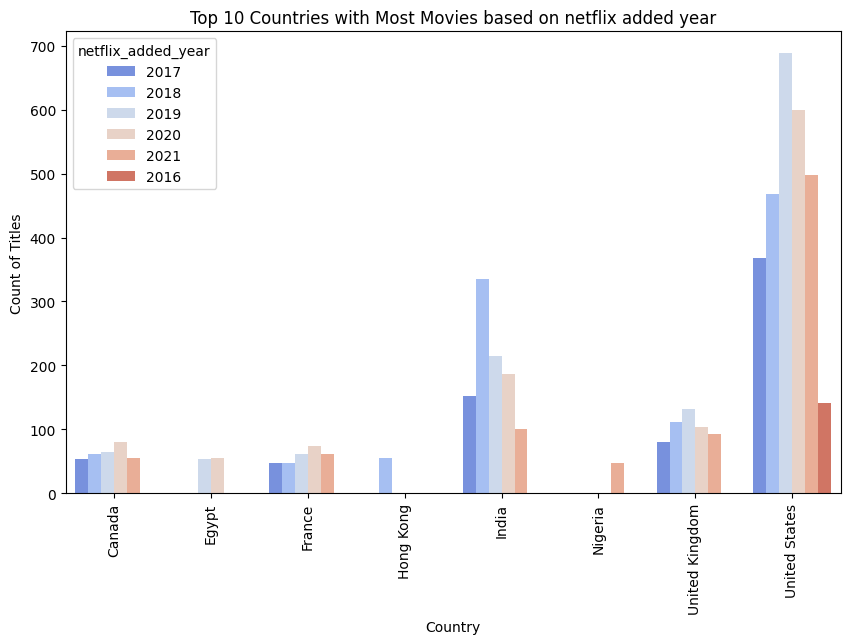

In [ ]:
xx = df_final[df_final['type'] == 'Movie']
xx = xx[xx.Country != 'Unknown Country'].groupby(['Country','netflix_added_year'])['title'].nunique().sort_values(ascending=False)[:30]
xx = xx.reset_index()
xx.sort_values(by=['Country','netflix_added_year'], inplace=True)
palette = sns.color_palette('coolwarm', n_colors=6)
plt.figure(figsize=(10, 6))
sns.barplot(x=xx.Country, y=xx.title, hue=xx.netflix_added_year, palette=palette)
plt.xticks(rotation=90)
plt.title('Top 10 Countries with Most Movies based on netflix added year')
plt.xlabel('Country')
plt.ylabel('Count of Titles')
plt.show()

In [ ]:
xx = df_final[df_final['type'] == 'Movie']
xx = xx[xx.Country != 'Unknown Country'].groupby(['Country','netflix_added_year'])['title'].nunique().sort_values(ascending=False)[:30]
xx = xx.reset_index()
xx.sort_values(by=['Country','netflix_added_year'], inplace=True)
xx

,Country,netflix_added_year,title
26,Canada,2017,54
19,Canada,2018,62
18,Canada,2019,65
16,Canada,2020,80
23,Canada,2021,55
25,Egypt,2019,54
24,Egypt,2020,55
28,France,2017,47
27,France,2018,48
20,France,2019,61


### Insights and related Actionable Items

> Insight number 1 : Netflix has more focus on Movies rather than TV Shows. It appears that there is 72.2% (or 145917) movies are available in the given Netflix dataset. On the contrary, there is only 27.8% (or 56148) TV shows are available.

> Actionable item 1 : To maximize the business Netflix should focuses on adding more movies.

> Insight 2 : There are three main insights that we can draw from the above chart.

    Over the release year, Netflix has stored comparatively high number of movies that are released between 1990 (approx.) to 2020. On the other hand, Netflix stored high amount of TV Shows that are released between 2010 (approx.) to 2020.

    It is obvious that there is significant rise of TV Shows in the recent years.

    Although Netflix has a good number of movies in its collection, the oldest content available in the Netflix platform is actually a TV Show which is released back in 1920's (approx.). This can also be considered as a potential outlier.

> Actionable Item 2 : This surprising result says that in coming years both TV Shows and Movies can show a considerable growth and as a result, it is a good idea to store all the available TV Shows and Movies as well.

> Insight 3 : It is considered that TV-MA rated TV Shows and movies are quite popular in Netflix platform. The other side of the coin is, the UR rated movies are unpopular in Netflix platform.

> Actionable Item 3 : While adding the content in Netflix, the business owner needs to check for the ratings. From the above picture, it is evident that contents that falls under the category of TV-MA and TV-14 is quite popular in the Netflix platform, and they can help in boosting the business.

> Insight 4 : It appears US, India and UK are some of the countries with most movies available. Please look at the bottom picture.

> Actionable Item 4: Nil.

> Insight 5 : It appears US, UK and Japan are some of the countries with most TV-shows available. Please look at the bottom picture.

> Actionable Item 5: Nil.

> Insight 6 : It appears Week 1, 44, 40, 9, 26 are some of the best weeks to launch a movie in the Netflix platform.

> Actionable item 6 : While considering adding a movie in the Netflix platform. Please make sure that they belong to the following weeks such as 1, 44, 40, 9 and 26. For instance, first week of January will fall under week 1 and so on.

> Insight 7 : It appears Week 27, 31, 35, 13, 26 are some of the best weeks to launch a TV-show in the Netflix platform.

> Actionable item 7 : While considering adding a TV Show in the Netflix platform. Please make sure that they belong to the following weeks such as 27, 31, 35, 13, 26. For instance, first week of July will fall under week 27 and so on.

> Insight 8 : best month to launch a Movie is July, April and December.

> Actionable item 8 : While considering adding a Movie in the Netflix platform. Please make sure that they belong to the following weeks such as July, April and December.

> Insight 9 : best month to launch a TV show is July, December and September.

> Actionable item 9 : While considering adding a TV show in the Netflix platform. Please make sure that they belong to the following weeks such as July, December and September.

> Insight 10 : It appears Anupam Kher, Rupa Bhimani and Om puri are some of the top actors with most movies

> Actionable Item 10 : While considering adding new movies to the platform please consider the movies with the following actors.

> Insight 11 : It appears Takahiro Sakurai, Junichi Suwabe and Ai Kayano are some of the top actors with most TV-shows

> Actionable Item 11 : While considering adding new TV shows to the platform please consider the TV shows with the following actors.

> Insight 12 : It appears that Rajiv Chilaka, Jan suter and Raul Campos are some of the well known movie directors whose movies are available in Netflix.

> Actionable Item 12 : While considering adding new movies to the platform please consider the movies with the following directors.

> Insight 13 : It appears that Alastair Fothergil, Ken Burns and Jung-ah lm are some of the well-known TV show directors whose TV shows are available in Netflix.

> Actionable Item 13 : While considering adding new TV show to the platform, please consider the TV shows with the following directors.

> Insight 14 : Quite famous genres available in the Netflix platform are international Dramas, TV Shows, Action, Adventure and so on. Please take a look at the following word cloud.

> Actionable Item 14 : While considering adding new content to the platform, please consider the contents with the following genres such as international Dramas, TV Shows, Action, Adventure and so on.

> Insight 15 : Quite famous content themes available in the Netflix platform are life, love, friend, Family and so on. Please take a look at the following word cloud.

> Actionable Item 15 : While considering adding new content to the platform, please consider the contents with the following theme in it such as love, life, Friend, family and so on.

> Insight 16 : The difference between the release year and date added is taken into account and identified a beautiful insight and that is it takes around 547 days or 1.5 years approximately to add a content in the Netflix platform once it is released.

> Actionable Item 16 : Please ensure that the content is added to the Netflix platform within 547 days or 1.5 years for boosting the Netflix business.

**Boosting Business across different countries.**

> Insight 17 : The following graph is a slice of a data frame that includes count of unique movie titles group by country and Netflix added year (year in which the movie got placed in Netflix). Generally, the trend increases from smaller year and after some time this trend starts to move downwards. For instance, take a look at country India. There is an upward trend from 2017 to 2018 however, it then immediately takes a downward trend. In case of USA, the upward trend originates from 2016 till 2019 and then took a downward trend. This trend is also visible in other countries. However, not all countries are considered for this analysis, still we can assume that this trend can also be seen in other countries.
It is evident that, in recent years the popularity of movies in the Netflix platform has plummeted.

> Actionable item 17 : To increase the business in these areas, consider India for instance, try to launch a TV-MA movie in July that belongs to the director Rajiv Chilaka or Jan Suter.
There are other ways to boost the business like reducing the Netflix adding time (currently 547 days or 1.5 years), or launching a movie in week 1, or an International drama and so on.








